<a href="https://colab.research.google.com/github/profliuhao/CSIT553/blob/main/CSIT553_class5_matplotlib_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSIT 553 Class 5: Intro to Matplotlib

## History
* Plotting package started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python
* Support on all operating systems and can export to multiple graphic formats (PDF, JPG, PNG, GIF, etc.)
* Has spawned a number of add-on toolkits like seaborn

## Architecture
* Backend Layer (FigureCanvas, Renderer, Event)
    * communicate to the drawing toolkits
* Artist Layer (Artist)
    * control and fine-tune of matplotlib, just like an artist paints on the canvas
* Scripting Layer (pyplot)
    * Lightest scripting interface to easy generation of graphics and plots


## Backend Layer (matplotlib.backend_bases)
Has three built-in abstract interface classes:
1. FigureCanvas: encompasses the area onto which the figure is drawn
2. Renderer: knows how to draw on FigureCanvas
3. Event: handles user inputs such as keyboard strokes and mouse clicks

## Artist Layer
* Comprised of one main object - Artist:
    * Knows how to use the Renderer to draw on the canvas.
* Title, lines, tick labels, and images are all correspond to indivudial **Artist** instance
* Two types of **Artist** objects:
    * **Primitive**: Line2D, Rectangle, Circle, and Text
    * **Composite**: Axis, Tick, Axes, and Figure
        * Most the Matplotlib API plotting methods are defined in Axes.

In [1]:
# only run once
!git clone https://github.com/profliuhao/CSIT553.git

Cloning into 'CSIT553'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 83 (delta 28), reused 32 (delta 5), pack-reused 0
Receiving objects: 100% (83/83), 452.89 KiB | 4.72 MiB/s, done.
Resolving deltas: 100% (28/28), done.


### Example: generate a histogram using the Artist layer:

In [2]:
# create 10000 random numbers using numpy
import numpy as np
x = np.random.randn(10000)

In [3]:
x


array([ 0.81374002,  0.81193754, -0.52501933, ...,  1.00373087,
       -1.13037724,  1.50402545])

In [4]:
# import FigureCanvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# import Figure artist
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

# create an axes artist. Axes artist is added to the figure axes container (figure.axes)
ax = fig.add_subplot(111)
# 111: create a grid with 1 row, 1 column, and uses the frist cell in that grid for the figure axes

In [5]:
# create a histogram of the 10000 numbers
ax.hist(x,100) # 100: create 100 bins

# add a title to the figure and save it
ax.set_title ('Normal distribution')

fig.savefig('Figure_hist.png')


## Scripting Layer
* Comprised mainly of **pyplot**, a scripting interface that is lighter than the **Artist** layer

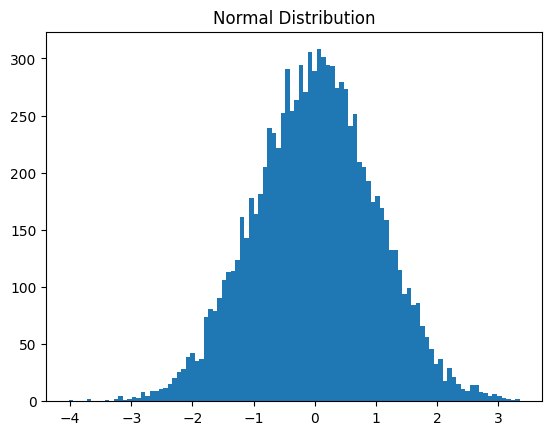

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x,100)
plt.title ('Normal Distribution')
plt.savefig('pyplot_hist.png')
plt.show()

## Further Reading
You can find more information about Matplotlib: its history and architecture, by the following link:

http://www.aosabook.org/en/matplotlib.html

## Basic Plotting with Matplotlib

### Plot Function
Almost all of the conventional visualization tools can be created by plot function.

In [7]:
# import pyplot
import matplotlib.pyplot as plt

# and
import numpy as np
import pandas as pd

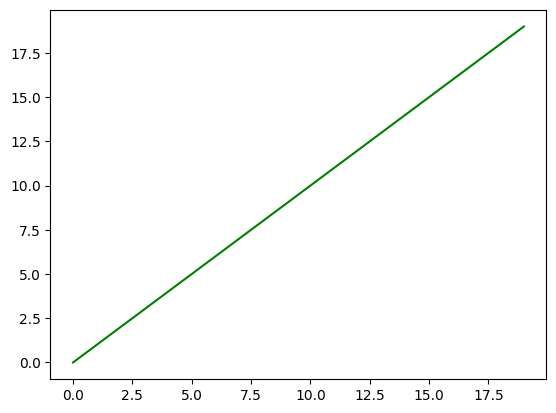

In [8]:
data = np.arange(20)
plt.plot(data,'g')
plt.show()

### Matplotlib Backends - inline
* Enforce plots to be rendered within the browser but not a separate window
* Limitation: cannot modify a figure once it's rendered

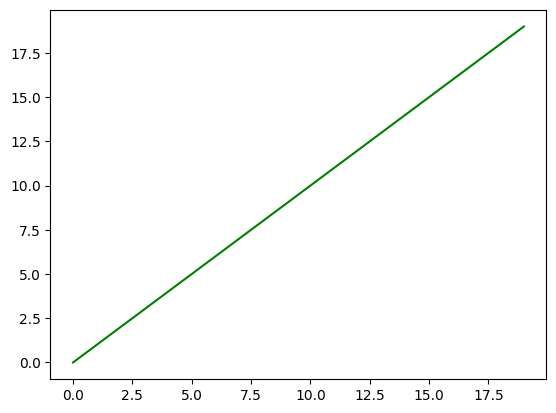

In [9]:
# %matplotlib inline

# import pyplot
import matplotlib.pyplot as plt

data = np.arange(20)
plt.plot(data,'g')
plt.show()

### Matplotlib Backends - notebook
* Any functions called will be applied to the active figure.
* Create a new figure if there is no active one.


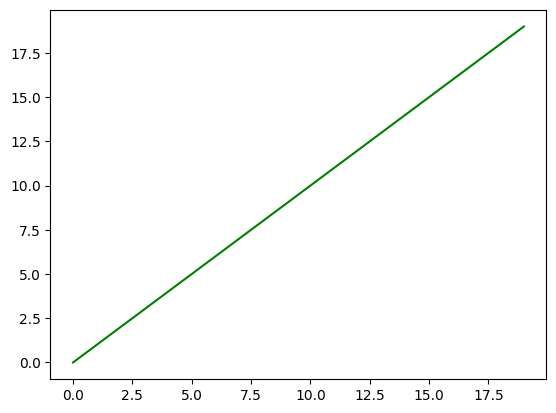

In [10]:
# %matplotlib notebook

# import pyplot
import matplotlib.pyplot as plt

data = np.arange(20)
plt.plot(data,'g')
plt.show()

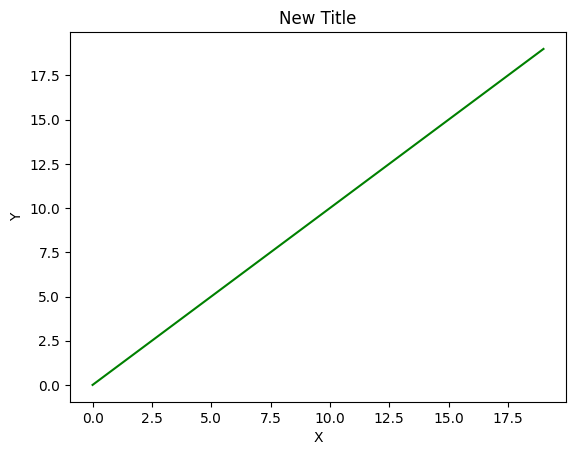

In [11]:
data = np.arange(20)
plt.plot(data,'g')
plt.xlabel("X")
plt.ylabel('Y')
plt.title("New Title")
plt.show()

## Figures and Subplots

To create a new figure: plt.figure()

In [12]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

* To create one or more subplots in one figure: **fig.add_subplot(a,b,N)**

* **a,b,N**: Nth subfigure of total **a** * **b** subfigures

In [13]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

In [14]:
# close all the figures
plt.close('all')

### More Options for Subplots

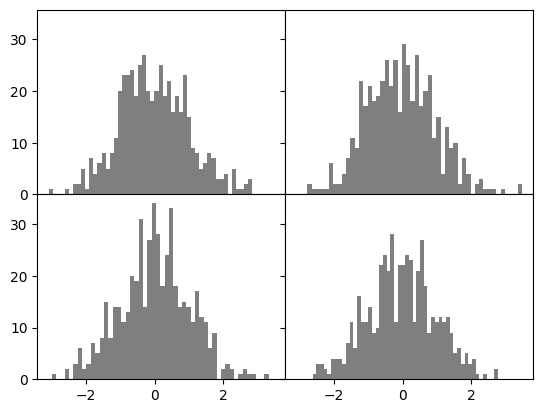

In [15]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True) # whether to share axis-x/axis-y

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) # adjust the spacing around subplots

In [16]:
plt.close('all')

### Colors, Markers, and Line Styles
Here are some examples to set colors, makers, and line styles in plot function
* **plot(x,y)**: plot x and y using default line style and color
* **plot(y)**:    plot y using x as index array 0 - N-1
* **plot(x,y,linestyle = ‘--’, color = ‘g’, marker = ‘o’)**: plot x and y using dotted line in green and circle marker
* **plot(x,y,’go--’)**: plot x and y using dotted line in green and circle marker



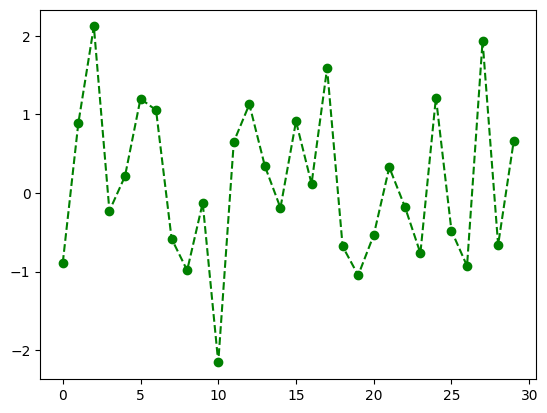

In [17]:
fig = plt.figure()

from numpy.random import randn

plt.plot(randn(30), 'go--')

In [18]:
plt.close('all')

For all the settings of colors, markers, and line styles, please refer to this link:

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

Text(0.5, 0, 'Stages')

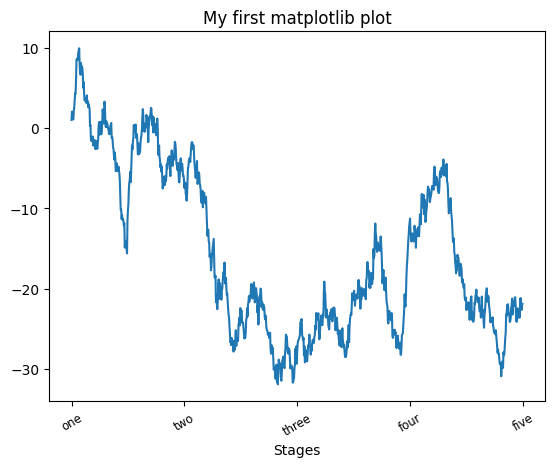

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

In [20]:
fig.savefig('first_plot.png')
plt.close('all')

#### Adding legends

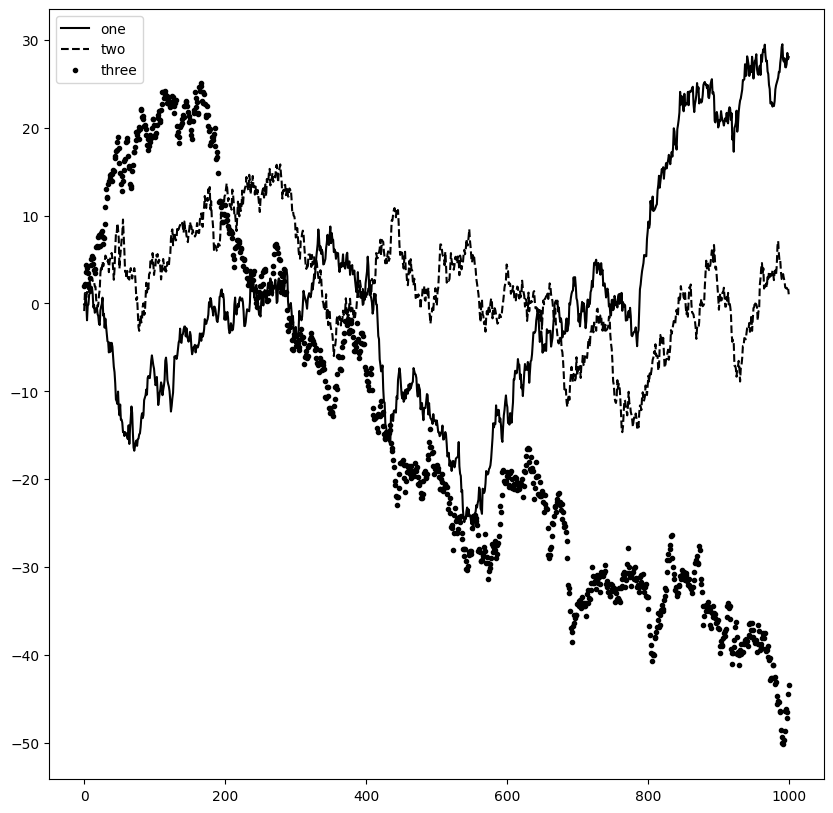

In [21]:
from numpy.random import randn
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

In [22]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

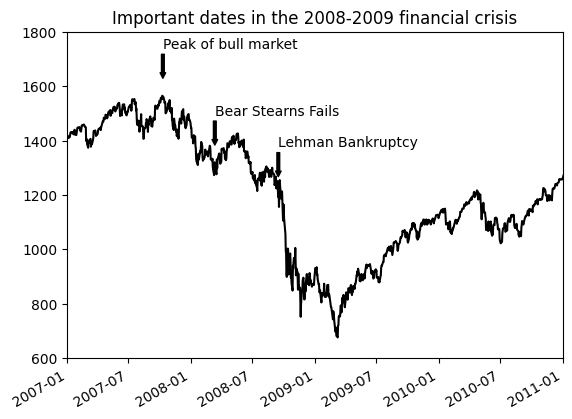

In [23]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

filename = '/content/CSIT553/Module_5/spx.csv'

data = pd.read_csv(filename, index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),   # position of the data point
                xytext=(date, spx.asof(date) + 225),     # position of the annotation
                arrowprops=dict(facecolor='black', headwidth=4, width=2,  # info of the arrow
                                headlength=4),
                horizontalalignment='left', verticalalignment='top') # position of the arrow to the annotation

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [24]:
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66
